In [ ]:
#import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Product Master')
df.head()

,ProductLine,ProductCode,MSRP
0,Classic Cars,S10_1949,214
1,Classic Cars,S10_4757,136
2,Classic Cars,S10_4962,147
3,Classic Cars,S12_1099,194
4,Classic Cars,S12_1108,207


In [ ]:
# prompt: combine df with sales df

import pandas as pd
import matplotlib.pyplot as plt
#import the relevant libraries
df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Product Master')
Sales_df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Main Data')

# Merge the two dataframes based on a common column (e.g., 'Product ID')
merged_df = pd.merge(df, Sales_df, on='ProductCode', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer' depending on your needs

# Now, 'merged_df' contains the combined data from both dataframes.
merged_df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ProductLine,ProductCode,MSRP,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,...,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice,TotalCost,TotalProfit
0,Classic Cars,S10_1949,214,10103,26,100.0,11,2600.0,Shipped,1,...,Stavern,4110,Norway,EMEA,Bergulfsen,Jonas,Bergenville,65.0,1690.0,910.0
1,Classic Cars,S10_1949,214,10112,29,100.0,1,2900.0,Shipped,1,...,Lule,S-958 22,Sweden,EMEA,Berglund,Christina,Geiselweg,65.0,1885.0,1015.0
2,Classic Cars,S10_1949,214,10126,38,100.0,11,3800.0,Shipped,2,...,Madrid,28023,Spain,EMEA,Sommer,Mart¡n,Geiselweg,65.0,2470.0,1330.0
3,Classic Cars,S10_1949,214,10140,37,100.0,11,3700.0,Shipped,3,...,Burlingame,94217,USA,NaN,Hirano,Juri,Geiselweg,65.0,2405.0,1295.0
4,Classic Cars,S10_1949,214,10150,45,100.0,8,4500.0,Shipped,3,...,Singapore,79903,Singapore,Japan,Natividad,Eric,Geiselweg,65.0,2925.0,1575.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductLine       2823 non-null   object 
 1   ProductCode       2823 non-null   object 
 2   MSRP              2823 non-null   int64  
 3   OrderNumber       2823 non-null   int64  
 4   QuantityOrdered   2823 non-null   int64  
 5   PriceEach         2823 non-null   float64
 6   OrderLineNumber   2823 non-null   int64  
 7   Sales             2823 non-null   float64
 8   Status            2823 non-null   object 
 9   QTR_ID            2823 non-null   int64  
 10  DAY_ID            2823 non-null   int64  
 11  MONTH_ID          2823 non-null   int64  
 12  YEAR_ID           2823 non-null   int64  
 13  CustomerName      2823 non-null   object 
 14  Phone             2823 non-null   object 
 15  AddressLine1      2823 non-null   object 
 16  City              2823 non-null   object 


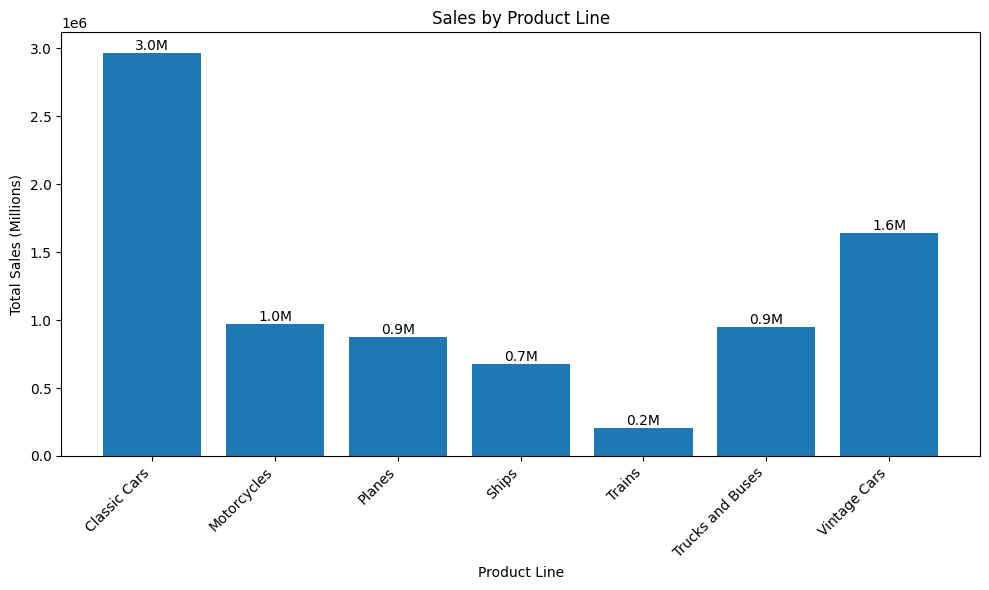

In [ ]:
# prompt: sales by product line include labels on the graph  in millions

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your merged_df from the previous code

# Group by Product Line and calculate total sales
sales_by_product_line = merged_df.groupby('ProductLine')['Sales'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(sales_by_product_line.index, sales_by_product_line.values)
plt.xlabel('Product Line')
plt.ylabel('Total Sales (Millions)')
plt.title('Sales by Product Line')

# Add labels on the graph in millions (with formatting)
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1000000:.1f}M', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       2823 non-null   int64  
 1   QuantityOrdered   2823 non-null   int64  
 2   PriceEach         2823 non-null   float64
 3   OrderLineNumber   2823 non-null   int64  
 4   Sales             2823 non-null   float64
 5   Status            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   DAY_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  ProductCode       2823 non-null   object 
 11  CustomerName      2823 non-null   object 
 12  Phone             2823 non-null   object 
 13  AddressLine1      2823 non-null   object 
 14  City              2823 non-null   object 
 15  PostalCode        2747 non-null   object 
 16  Country           2823 non-null   object 


In [ ]:
# Input Nan With North America for Territory
Sales_df['Territory'].fillna('North America', inplace=True)

#Input Nan with unspecified for PostalCode
Sales_df['PostalCode'].fillna('Unspecified', inplace=True)

<ipython-input-7-a8d91ab57ace>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Sales_df['Territory'].fillna('North America', inplace=True)
<ipython-input-7-a8d91ab57ace>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductLine       2823 non-null   object 
 1   ProductCode       2823 non-null   object 
 2   MSRP              2823 non-null   int64  
 3   OrderNumber       2823 non-null   int64  
 4   QuantityOrdered   2823 non-null   int64  
 5   PriceEach         2823 non-null   float64
 6   OrderLineNumber   2823 non-null   int64  
 7   Sales             2823 non-null   float64
 8   Status            2823 non-null   object 
 9   QTR_ID            2823 non-null   int64  
 10  DAY_ID            2823 non-null   int64  
 11  MONTH_ID          2823 non-null   int64  
 12  YEAR_ID           2823 non-null   int64  
 13  CustomerName      2823 non-null   object 
 14  Phone             2823 non-null   object 
 15  AddressLine1      2823 non-null   object 
 16  City              2823 non-null   object 


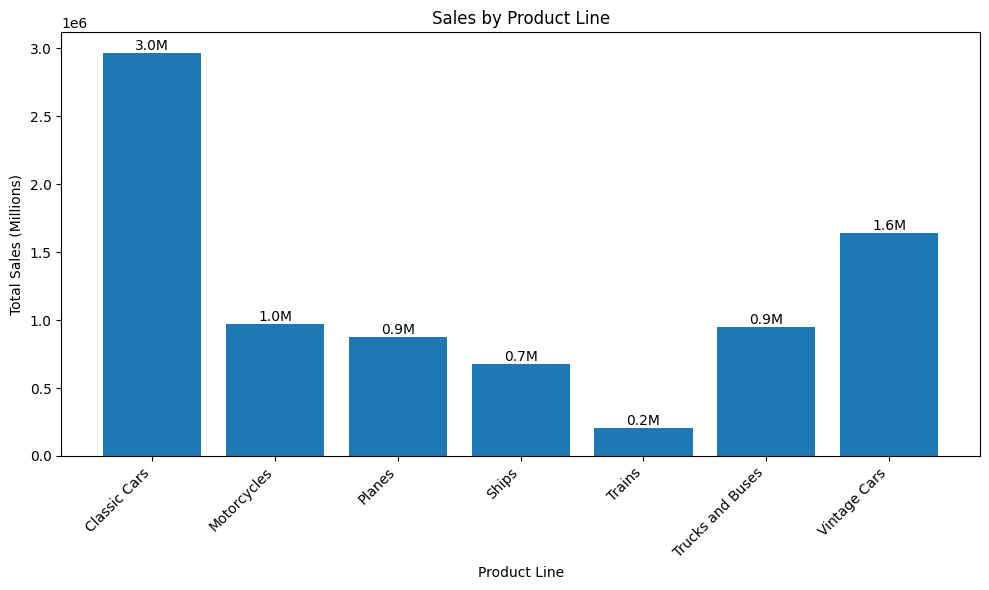

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       2823 non-null   int64  
 1   QuantityOrdered   2823 non-null   int64  
 2   PriceEach         2823 non-null   float64
 3   OrderLineNumber   2823 non-null   int64  
 4   Sales             2823 non-null   float64
 5   Status            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   DAY_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  ProductCode       2823 non-null   object 
 11  CustomerName      2823 non-null   object 
 12  Phone             2823 non-null   object 
 13  AddressLine1      2823 non-null   object 
 14  City              2823 non-null   object 
 15  PostalCode        2747 non-null   object 
 16  Country           2823 non-null   object 


<ipython-input-20-7d6b8cb17051>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Sales_df['Territory'].fillna('North America', inplace=True)
<ipython-input-20-7d6b8cb17051>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# prompt: singapore country in Japan Territory make it APAC territory

import pandas as pd
import matplotlib.pyplot as plt
#import the relevant libraries
df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Product Master')
df.head()

#import the relevant libraries
df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Product Master')
Sales_df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Main Data')

# Merge the two dataframes based on a common column (e.g., 'Product ID')
merged_df = pd.merge(df, Sales_df, on='ProductCode', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer' depending on your needs

# Now, 'merged_df' contains the combined data from both dataframes.
merged_df.head()
merged_df.info()


# Assuming you have your merged_df from the previous code

# Group by Product Line and calculate total sales
sales_by_product_line = merged_df.groupby('ProductLine')['Sales'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(sales_by_product_line.index, sales_by_product_line.values)
plt.xlabel('Product Line')
plt.ylabel('Total Sales (Millions)')
plt.title('Sales by Product Line')

# Add labels on the graph in millions (with formatting)
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1000000:.1f}M', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
Sales_df.info()
# Input Nan With North America for Territory
Sales_df['Territory'].fillna('North America', inplace=True)

#Input Nan with unspecified for PostalCode
Sales_df['PostalCode'].fillna('Unspecified', inplace=True)

# Change 'Singapore' country to APAC territory
Sales_df.loc[Sales_df['Country'] == 'Singapore', 'Territory'] = 'APAC'

In [ ]:
# prompt: total sales for singapore

# Assuming you have your Sales_df from the previous code

# Filter sales data for Singapore
singapore_sales = Sales_df[Sales_df['Country'] == 'Singapore']

# Calculate the total sales for Singapore
total_sales_singapore = singapore_sales['Sales'].sum()

print(f"Total sales for Singapore: {total_sales_singapore}")

Total sales for Singapore: 227985.5


In [ ]:
# prompt: Make Japan Country to be part of APAC Territory then calculate total sales in each Territory

import pandas as pd
import matplotlib.pyplot as plt

#import the relevant libraries
df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Product Master')
Sales_df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Main Data')

# Merge the two dataframes based on a common column (e.g., 'Product ID')
merged_df = pd.merge(df, Sales_df, on='ProductCode', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer' depending on your needs

# Now, 'merged_df' contains the combined data from both dataframes.

# Change 'Japan' country to APAC territory
Sales_df.loc[Sales_df['Country'] == 'Japan', 'Territory'] = 'APAC'

# Group by Territory and calculate total sales
total_sales_by_territory = Sales_df.groupby('Territory')['Sales'].sum()

total_sales_by_territory

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sales
Territory,
APAC,771380.70
EMEA,4128005.42
Japan,211571.12


In [ ]:
# prompt: put singapore country  in japan territory to APAC

import pandas as pd
import matplotlib.pyplot as plt
#import the relevant libraries
df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Product Master')
df.head()

#import the relevant libraries
df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Product Master')
Sales_df = pd.read_excel('/content/Salesdata (1).xlsx', sheet_name='Main Data')

# Merge the two dataframes based on a common column (e.g., 'Product ID')
merged_df = pd.merge(df, Sales_df, on='ProductCode', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer' depending on your needs

# Now, 'merged_df' contains the combined data from both dataframes.
merged_df.head()
merged_df.info()


# Assuming you have your merged_df from the previous code

# Group by Product Line and calculate total sales
sales_by_product_line = merged_df.groupby('ProductLine')['Sales'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(sales_by_product_line.index, sales_by_product_line.values)
plt.xlabel('Product Line')
plt.ylabel('Total Sales (Millions)')
plt.title('Sales by Product Line')

# Add labels on the graph in millions (with formatting)
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1000000:.1f}M', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
Sales_df.info()
# Input Nan With North America for Territory
Sales_df['Territory'].fillna('North America', inplace=True)

#Input Nan with unspecified for PostalCode
Sales_df['PostalCode'].fillna('Unspecified', inplace=True)

# Change Singapore to APAC
Sales_df.loc[Sales_df['Country'] == 'Singapore', 'Territory'] = 'APAC'

In [ ]:
#Reconfirm missing values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductLine       2823 non-null   object 
 1   ProductCode       2823 non-null   object 
 2   MSRP              2823 non-null   int64  
 3   OrderNumber       2823 non-null   int64  
 4   QuantityOrdered   2823 non-null   int64  
 5   PriceEach         2823 non-null   float64
 6   OrderLineNumber   2823 non-null   int64  
 7   Sales             2823 non-null   float64
 8   Status            2823 non-null   object 
 9   QTR_ID            2823 non-null   int64  
 10  DAY_ID            2823 non-null   int64  
 11  MONTH_ID          2823 non-null   int64  
 12  YEAR_ID           2823 non-null   int64  
 13  CustomerName      2823 non-null   object 
 14  Phone             2823 non-null   object 
 15  AddressLine1      2823 non-null   object 
 16  City              2823 non-null   object 


In [ ]:
# Checking data quality: Correct the sales column by multiplying the quantity ordered column with the priceEach
Sales_df['Sales'] = Sales_df['QuantityOrdered'] * Sales_df['PriceEach']
Sales_df.head()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice,TotalCost,TotalProfit
0,10100,49,34.47,1,1689.03,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Skates Road,22.4055,1097.8695,591.1605
1,10100,50,67.80,2,3390.00,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Bergenville,44.0700,2203.5000,1186.5000
2,10100,30,100.00,3,3000.00,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Bergenville,65.0000,1950.0000,1050.0000
3,10100,22,86.51,4,1903.22,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Skates Road,56.2315,1237.0930,666.1270
4,10101,26,100.00,1,2600.00,Shipped,1,9,1,2022,...,Frankfurt,60528,Germany,EMEA,Keitel,Roland,Bergenville,65.0000,1690.0000,910.0000


In [ ]:
# prompt: calculate product line sales per year

# Group by 'Product Line' and 'Year' and calculate the sum of sales
product_line_sales_per_year = merged_df.groupby(['ProductLine', 'YEAR_ID'])['Sales'].sum().reset_index()

# Print the result
product_line_sales_per_year

,ProductLine,YEAR_ID,Sales
0,Classic Cars,2022,1104942.24
1,Classic Cars,2023,1335951.93
2,Classic Cars,2024,527652.23
3,Motorcycles,2022,310176.51
4,Motorcycles,2023,468423.82
5,Motorcycles,2024,192485.96
6,Planes,2022,242883.30
7,Planes,2023,459210.25
8,Planes,2024,175848.66
9,Ships,2022,233746.81


In [ ]:
# Check for duplicates
Sales_df.duplicated().sum()

0

The column territory had missing value which was imputed with the country's region, i.e. North America. The postal code missing values were imputed using unspecified. No data will be dropped.


In [ ]:
# prompt: Calculate total cost for each item

# Calculate total cost for each item
Sales_df['TotalCost'] = Sales_df['QuantityOrdered'] * Sales_df['CostPrice']
Sales_df.head()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,City,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice,TotalCost,TotalProfit
0,10100,49,34.47,1,1689.03,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Skates Road,22.4055,1097.8695,591.1605
1,10100,50,67.80,2,3390.00,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Bergenville,44.0700,2203.5000,1186.5000
2,10100,30,100.00,3,3000.00,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Bergenville,65.0000,1950.0000,1050.0000
3,10100,22,86.51,4,1903.22,Shipped,1,6,1,2022,...,Nashua,62005,USA,North America,Young,Valarie,Skates Road,56.2315,1237.0930,666.1270
4,10101,26,100.00,1,2600.00,Shipped,1,9,1,2022,...,Frankfurt,60528,Germany,EMEA,Keitel,Roland,Bergenville,65.0000,1690.0000,910.0000


In [ ]:
# prompt: generate order date column by combining DAY-ID, MONTH_ID and YEAR_ID

# Assuming 'DAY_ID', 'MONTH_ID', and 'YEAR_ID' columns exist in your Sales_df
Sales_df['OrderDate'] = pd.to_datetime(Sales_df[['YEAR_ID', 'MONTH_ID', 'DAY_ID']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')
Sales_df.head()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,Status,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,...,PostalCode,Country,Territory,ContactLastName,ContactFirstName,Branch,CostPrice,TotalCost,TotalProfit,OrderDate
0,10100,49,34.47,1,1689.03,Shipped,1,6,1,2022,...,62005,USA,North America,Young,Valarie,Skates Road,22.4055,1097.8695,591.1605,2022-01-06
1,10100,50,67.80,2,3390.00,Shipped,1,6,1,2022,...,62005,USA,North America,Young,Valarie,Bergenville,44.0700,2203.5000,1186.5000,2022-01-06
2,10100,30,100.00,3,3000.00,Shipped,1,6,1,2022,...,62005,USA,North America,Young,Valarie,Bergenville,65.0000,1950.0000,1050.0000,2022-01-06
3,10100,22,86.51,4,1903.22,Shipped,1,6,1,2022,...,62005,USA,North America,Young,Valarie,Skates Road,56.2315,1237.0930,666.1270,2022-01-06
4,10101,26,100.00,1,2600.00,Shipped,1,9,1,2022,...,60528,Germany,EMEA,Keitel,Roland,Bergenville,65.0000,1690.0000,910.0000,2022-01-09


In [ ]:
# prompt: calculated total profit

# Calculate total profit
Sales_df['Profit'] = Sales_df['Sales'] - Sales_df['TotalCost']
Sales_df.head()
total_profit = Sales_df['Profit'].sum()
print(f"Total Profit: {total_profit}")

Total Profit: 2901810.3765000002


In [ ]:
# prompt: calculate percentage profit

# Calculate percentage profit
total_cost = Sales_df['TotalCost'].sum()
percentage_profit = (total_profit / total_cost) * 100 if total_cost else 0
print(f"Percentage Profit: {percentage_profit:.2f}%")

Percentage Profit: 53.85%


Peak season month: 11
Peak season sales: 1744682.45


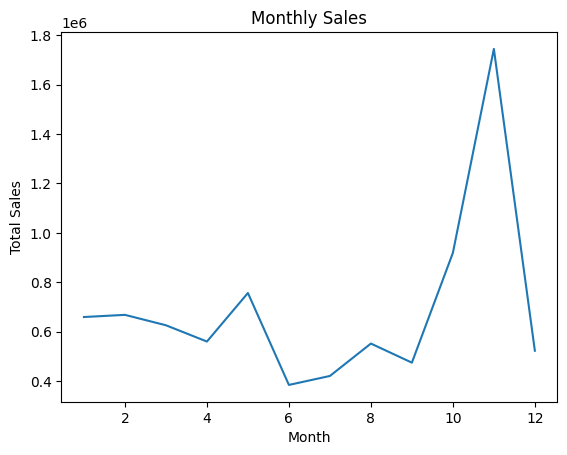

In [ ]:
# prompt: calculate peak season sales

# Convert the 'OrderDate' column to datetime objects
Sales_df['OrderDate'] = pd.to_datetime(Sales_df['OrderDate'])

# Extract the month from the 'OrderDate' column
Sales_df['Month'] = Sales_df['OrderDate'].dt.month

# Group sales by month and calculate the total sales for each month
monthly_sales = Sales_df.groupby('Month')['Sales'].sum()

# Find the month with the highest sales
peak_season_month = monthly_sales.idxmax()

# Calculate the total sales for the peak season month
peak_season_sales = monthly_sales.max()

print(f"Peak season month: {peak_season_month}")
print(f"Peak season sales: {peak_season_sales}")

# Optional: You can also plot the monthly sales to visualize the peak season
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()

In [ ]:
# prompt: Monthly average sales for all three years and in quatres

# Calculate monthly average sales for all three years
monthly_average_sales = Sales_df.groupby(['YEAR_ID', 'Month'])['Sales'].mean()
print("Monthly Average Sales:\n", monthly_average_sales)

# Calculate quarterly average sales for all three years
Sales_df['Quarter'] = Sales_df['OrderDate'].dt.quarter
quarterly_average_sales = Sales_df.groupby(['YEAR_ID', 'Quarter'])['Sales'].mean()
print("\nQuarterly Average Sales:\n", quarterly_average_sales)

Monthly Average Sales:
 YEAR_ID  Month
2022     1        2766.306667
         2        2927.726829
         3        2881.924600
         4        2921.052241
         5        2821.622759
         6        3033.757391
         7        2997.394600
         8        2862.522759
         9        2776.919211
         10       2950.889684
         11       2872.308345
         12       3001.674429
2023     1        2945.229341
         2        3004.523837
         3        2981.402857
         4        2702.121875
         5        2983.988378
         6        2884.597059
         7        2979.160549
         8        2903.057068
         9        2777.413263
         10       2847.774403
         11       2971.691628
         12       2845.963000
2024     1        2865.459192
         2        2988.683505
         3        2972.942830
         4        3892.457679
         5        3102.863750
Name: Sales, dtype: float64

Quarterly Average Sales:
 YEAR_ID  Quarter
2022     1         

**Univariate analysis**

In [ ]:
# check for outliers
Sales_df.describe()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,CostPrice,TotalCost,TotalProfit,OrderDate,Profit,Month,Quarter
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,2936.906408,2.717676,14.291534,7.092455,2022.81509,54.378054,1908.989165,1027.917243,2023-05-11 12:41:03.761955584,1027.917243,7.092455,2.717676
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,1.000000,2022.00000,17.472000,313.384500,168.745500,2022-01-06 00:00:00,168.745500,1.000000,1.000000
25%,10180.000000,27.000000,68.860000,3.000000,2100.000000,2.000000,6.000000,4.000000,2022.00000,44.759000,1365.000000,735.000000,2022-11-06 12:00:00,735.000000,4.000000,2.000000
50%,10262.000000,35.000000,95.700000,6.000000,2800.000000,3.000000,14.000000,8.000000,2023.00000,62.205000,1820.000000,980.000000,2023-06-15 00:00:00,980.000000,8.000000,3.000000
75%,10333.500000,43.000000,100.000000,9.000000,3726.810000,4.000000,21.000000,11.000000,2023.00000,65.000000,2422.426500,1304.383500,2023-11-17 12:00:00,1304.383500,11.000000,4.000000
max,10425.000000,97.000000,100.000000,18.000000,9048.160000,4.000000,31.000000,12.000000,2024.00000,65.000000,5881.304000,3166.856000,2024-05-31 00:00:00,3166.856000,12.000000,4.000000
std,92.085478,9.741443,20.174277,4.225841,1105.644284,1.203878,8.777409,3.656633,0.69967,13.113280,718.668784,386.975499,NaN,386.975499,3.656633,1.203878


In [ ]:
# prompt: PRODUCT LINE SALES , INCLUDE VALUES AND PLOT

# Group sales by product line and calculate the total sales for each product line
product_line_sales = Merged_df.groupby('Product Line')['Sales'].sum()

# Print the total sales for each product line
print("Product Line Sales:\n", product_line_sales)

# Plot the product line sales using a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(product_line_sales.index, product_line_sales.values)
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

NameError: name 'Merged_df' is not defined

In [ ]:
# plot to check for outliers for sales
Sales_df.boxplot(column=['Sales'])

Sales_df['Sales'] = Sales_df['Sales'].clip(lower=lower_bound, upper=upper_bound)
This replaces the outliers with the upper and lower bounds.

In [ ]:
# Plotting for univariate analysis for all important data atleast four include mean median mode for each and skewness

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# Assuming 'Sales_df' is already defined and loaded as in your previous code

def univariate_analysis(df, column):
  """
  Performs univariate analysis for a given column, including:
  - Histogram
  - Mean, Median, Mode, Skewness
  """
  plt.figure(figsize=(6,4))
  plt.hist(df[column], bins=20)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

  print(f"Mean of {column}: {df[column].mean()}")
  print(f"Median of {column}: {df[column].median()}")

  try:
    mode = df[column].mode()[0]
    print(f"Mode of {column}: {mode}")
  except IndexError:
    print(f"Mode of {column}: No unique mode found")

  print(f"Skewness of {column}: {skew(df[column])}")


# Select the columns for univariate analysis
columns_to_analyze = ['Sales', 'QuantityOrdered', 'PriceEach']

# Perform analysis for each selected column
for column in columns_to_analyze:
  univariate_analysis(Sales_df, column)


In [ ]:
# prompt: #  Plotting for univariate analysis for all important data atleast four include mean median mode for each and skewness   - 'OrderNumber' (Frequency of orders, distribution)
# #     - 'OrderDate' (Sales trend over time, seasonality)
# #     - 'Territory' (Distribution of sales by territory)
# #     - 'ProductLine' (Distribution of sales by product line)
# #     - 'Country' (Sales performance by country)

# Assuming 'Sales_df' is already defined and loaded as in your previous code

def univariate_analysis(df, column):
  """
  Performs univariate analysis for a given column, including:
  - Histogram
  - Mean, Median, Mode, Skewness
  """
  plt.figure(figsize=(6,4))
  plt.hist(df[column], bins=20)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

  print(f"Mean of {column}: {df[column].mean()}")
  print(f"Median of {column}: {df[column].median()}")

  try:
    mode = df[column].mode()[0]
    print(f"Mode of {column}: {mode}")
  except IndexError:
    print(f"Mode of {column}: No unique mode found")

  print(f"Skewness of {column}: {skew(df[column])}")


# OrderNumber (Frequency of orders, distribution)
univariate_analysis(Sales_df, 'OrderNumber')

# OrderDate (Sales trend over time, seasonality)
Sales_df['QTR_ID'] = pd.to_datetime(Sales_df['QTR_ID'])
Sales_df.groupby(Sales_df['QTR_ID'].dt.date)['Sales'].sum().plot(figsize=(6, 4))
plt.title('Sales Trend Over Time')
plt.xlabel('QTR_ID')
plt.ylabel('Total Sales')
plt.show()


# Territory (Distribution of sales by territory)
Sales_df.groupby('Territory')['Sales'].sum().plot(kind='bar', figsize=(6, 4))
plt.title('Sales Distribution by Territory')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.show()

# ProductLine (Distribution of sales by product line)
Sales_df.groupby(' ProductCode')['Sales'].sum().plot(kind='bar', figsize=(6, 4))
plt.title('Sales Distribution by  ProductCode')
plt.xlabel(' ProductCode')
plt.ylabel('Total Sales')
plt.show()

# Country (Sales performance by country)
Sales_df.groupby('Country')['Sales'].sum().plot(kind='bar', figsize=(6, 4))
plt.title('Sales Performance by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


## **`Bivariate Analysis `**

**Sales vs Region**

In [ ]:
# prompt: total sales within territories  and plot

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the Sales_df DataFrame as shown in the previous code

# Group by Territory and calculate total sales
territory_sales = Sales_df.groupby('Territory')['Sales'].sum()

# Create a bar plot
plt.figure(figsize=(6,8))
plt.bar(territory_sales.index, territory_sales.values)
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.title('Total Sales Within Territories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: TOP 10 total sales within territories  and plot per year_ID and also per QTR_ID  and include values

# Group by Territory and Year_ID, calculate total sales, and get top 10
top_10_sales_by_territory_year = Sales_df.groupby(['Territory', 'YEAR_ID'])['Sales'].sum().nlargest(10)

# Plot total sales per Year_ID for top 10 territories
top_10_sales_by_territory_year.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Territories by Total Sales Per Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year_ID')

# Annotate values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')


plt.tight_layout()
plt.show()


# Group by Territory and QTR_ID, calculate total sales, and get top 10
top_10_sales_by_territory_qtr = Sales_df.groupby(['Territory', 'QTR_ID'])['Sales'].sum().nlargest(10)

# Plot total sales per QTR_ID for top 10 territories
top_10_sales_by_territory_qtr.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Territories by Total Sales Per Quarter')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='QTR_ID')


# Annotate values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Total sales top 10 countries per YEAR_ID Bar chart

# Group by Country and YEAR_ID, calculate total sales, and get top 10
top_10_sales_by_country_year = Sales_df.groupby(['Country', 'YEAR_ID'])['Sales'].sum().nlargest(10)

# Plot total sales per Year_ID for top 10 countries
top_10_sales_by_country_year.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries by Total Sales Per Year')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year_ID')

# Annotate values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')


plt.tight_layout()
plt.show()

**Sales vs Order**

In [ ]:
# prompt: Total sales top 10 countries

Totalsales_country = Sales_df.groupby('Country')['Sales'].sum()
top_10_countries = Totalsales_country.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Countries by Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Sales vs Customers ***

In [ ]:
# Total sales by customer name and plot top 10 indicate their sales on top

# Group by customer name and calculate total sales
customer_sales = Sales_df.groupby('CustomerName')['Sales'].sum()

# Sort by total sales in descending order and get the top 10
top_10_customers = customer_sales.sort_values(ascending=False).head(10)

# Plot the top 10 customers and their total sales
plt.figure(figsize=(6,4))
plt.bar(top_10_customers.index, top_10_customers.values)
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Total sales by customer name and  YEAR_ID	using bar chart

# Group by customer name and year, then calculate total sales
total_sales_by_customer_year = Sales_df.groupby(['CustomerName', 'YEAR_ID'])['Sales'].sum().reset_index()

# Sort the data by YEAR_ID and total sales in descending order to find the top 10
top_10_customers_by_year = total_sales_by_customer_year.sort_values(['YEAR_ID', 'Sales'], ascending=[True, False])

# Group by year and get the top 10 customers for each year
top_10_by_year = {}
for year in top_10_customers_by_year['YEAR_ID'].unique():
  top_10_by_year[year] = top_10_customers_by_year[top_10_customers_by_year['YEAR_ID'] == year].head(10)


# Plot top 10 customers by sales for each year using bar chart
for year, data in top_10_by_year.items():
  plt.figure(figsize=(8,10))
  plt.bar(data['CustomerName'], data['Sales'])
  plt.title(f'Top 10 Customers by Sales in {year}')
  plt.xlabel('Customer Name')
  plt.ylabel('Total Sales')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping

  # Add labels with rounded values to two decimal places
  for i, v in enumerate(data['Sales']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

  plt.show()

In [ ]:
# Total sales by customer name and plot top 10 indicate their sales on top


# Sort the total sales in descending order and get the top 10
top_10_customers = Totalsales.sort_values(ascending=False).head(10)

# Create a bar plot of the top 10 customers and their sales
plt.figure(figsize=(12, 6))
plt.bar(top_10_customers.index, top_10_customers.values)
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with their sales values
for i, v in enumerate(top_10_customers.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# prompt: Total sales top 10 countries per YEAR_ID and QTR_ID

In [ ]:
# prompt: Total sales top 10 countries

Totalsales_country = Sales_df.groupby('Country')['Sales'].sum()
top_10_countries = Totalsales_country.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Countries by Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: total sales by product code top 1o and plot

# Assuming you have already loaded the Sales_df DataFrame

# Group by ProductCode and calculate total sales
product_sales = Sales_df.groupby('ProductCode')['Sales'].sum()

# Get the top 10 product codes by total sales
top_10_products = product_sales.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_products.index, top_10_products.values)
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()